**Deep Learning Image Classification with CNN**

Lesson Overview:
In this lesson, we are going to discuss Image classification with CNN.

Use Case Description:

Image Classification with CNN

1. Training the model

2. Evaluating the model

Programming elements:

1. About CNN

2. Hyperparameters of CNN

3. Image classification with CNN

In [ ]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 32, 32, 3 ), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
1563/1563 [==============================] - 13s 7ms/step - loss: 1.6967 - accuracy: 0.3877 - val_loss: 1.3964 - val_accuracy: 0.4999
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3724 - accuracy: 0.5056 - val_loss: 1.2746 - val_accuracy: 0.5375
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2380 - accuracy: 0.5570 - val_loss: 1.1686 - val_accuracy: 0.5804
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1185 - accuracy: 0.6013 - val_loss: 1.1082 - val_accuracy: 0.6056
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0318 - accuracy: 0.6331 - val_loss: 1.0473 - val_accuracy: 0.6289
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9492 - accuracy: 0.6626 - val_loss: 1.0193 - val_accuracy: 0.6376
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8768 - accuracy: 0.6893 - val_loss: 1.0034 - val_accur

In class programming:
1. Follow the instruction below and then report how the performance changed.(apply all at once)

• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Flatten layer.

• Dropout layer at 20%.

• Fully connected layer with 1024 units and a rectifier activation function.

• Dropout layer at 20%.

• Fully connected layer with 512 units and a rectifier activation function.

• Dropout layer at 20%.

• Fully connected output layer with 10 units and a Softmax activation function

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate / epochs

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=1)

Epoch 1/25
1563/1563 [==============================] - 15s 8ms/step - loss: 2.1448 - accuracy: 0.1978 - val_loss: 1.9275 - val_accuracy: 0.3111
Epoch 2/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8119 - accuracy: 0.3427 - val_loss: 1.6578 - val_accuracy: 0.4007
Epoch 3/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6236 - accuracy: 0.4081 - val_loss: 1.4978 - val_accuracy: 0.4657
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4924 - accuracy: 0.4573 - val_loss: 1.3815 - val_accuracy: 0.5091
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3904 - accuracy: 0.4944 - val_loss: 1.3147 - val_accuracy: 0.5238
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2971 - accuracy: 0.5306 - val_loss: 1.2667 - val_accuracy: 0.5447
Epoch 7/25
  22/1563 [..............................] - ETA: 11s - loss: 1.2496 - accuracy: 0.5597

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.09%


Did the performance change?

Yes, the performance changed as we added more layers to the model. There was almost 8 percent increase in the accuracy.

2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

In [ ]:
# Predict the first 4 images from the test set
predictions = model.predict(X_test[:4])

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the results
for i in range(4):
    print("Predicted:", predicted_labels[i], "| Actual:", actual_labels[i])

1/1 [==============================] - 0s 19ms/step
Predicted: 3 | Actual: 3
Predicted: 8 | Actual: 8
Predicted: 8 | Actual: 8
Predicted: 0 | Actual: 0


3. Visualize Loss and Accuracy using the history object

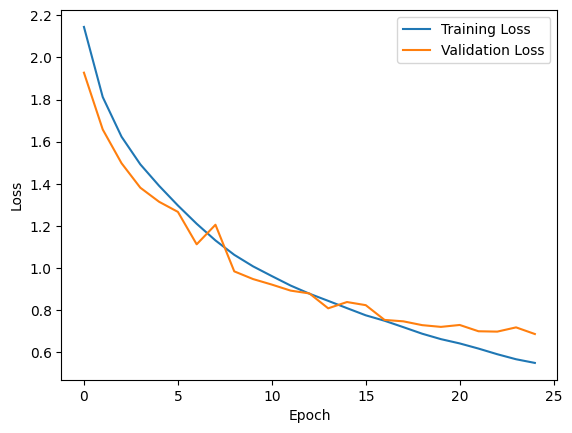

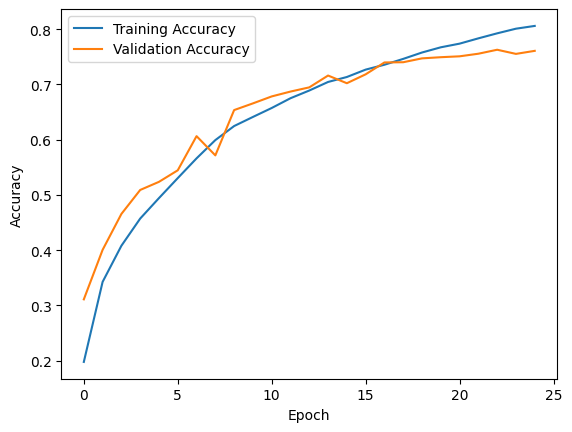

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()